In [25]:
#3.4.3
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words =10000)

import numpy as np
import random

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

print(x_val.shape)
print(y_val.shape)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=1024,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

print(history.history.keys())

(10000, 10000)
(10000,)
Epoch 1/20
15/15 [==============================] - 1s 59ms/step - loss: 0.5611 - accuracy: 0.7470 - val_loss: 0.5246 - val_accuracy: 0.7794
Epoch 2/20
15/15 [==============================] - 0s 27ms/step - loss: 0.3912 - accuracy: 0.8835 - val_loss: 0.3734 - val_accuracy: 0.8731
Epoch 3/20
15/15 [==============================] - 0s 27ms/step - loss: 0.3010 - accuracy: 0.9179 - val_loss: 0.3576 - val_accuracy: 0.8622
Epoch 4/20
15/15 [==============================] - 0s 28ms/step - loss: 0.2398 - accuracy: 0.9347 - val_loss: 0.3023 - val_accuracy: 0.8846
Epoch 5/20
15/15 [==============================] - 0s 26ms/step - loss: 0.1941 - accuracy: 0.9476 - val_loss: 0.3868 - val_accuracy: 0.8481
Epoch 6/20
15/15 [==============================] - 0s 26ms/step - loss: 0.1561 - accuracy: 0.9602 - val_loss: 0.3179 - val_accuracy: 0.8799
Epoch 7/20
15/15 [==============================] - 0s 26ms/step - loss: 0.1339 - accuracy: 0.9628 - val_loss: 0.2904 - val_accura

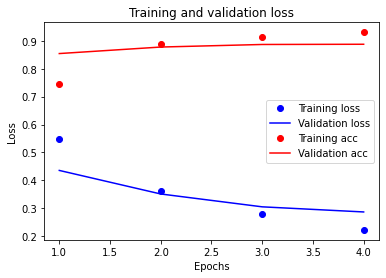

In [24]:
#3.4.4
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.plot(epochs, acc_values, 'ro', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()